<a href="https://colab.research.google.com/github/naga-sk/DataScienceTraining-Assignments/blob/main/AIML/drug200_NB_and_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score

# Read Data

In [49]:
df = pd.read_csv("https://raw.githubusercontent.com/balaji2v/Inceptez_Batch19/main/drug200.csv")

In [50]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


# Making Sense of Data



In [51]:
# Analysis of objects - Categorical and String data

df.describe(include='O').T

,count,unique,top,freq
Sex,200,2,M,104
BP,200,3,HIGH,77
Cholesterol,200,2,HIGH,103
Drug,200,5,DrugY,91


In [52]:
# Analysis of numeric variables - both discrete and continuous

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


# Preparing Data

In [53]:
# Check all the unique values
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [54]:
df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [55]:
df.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [56]:
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [57]:
# Map the result to discrete numeric values using a label encoder
from sklearn.preprocessing import LabelEncoder

df.Sex = LabelEncoder().fit_transform(df.Sex)
df.BP = LabelEncoder().fit_transform(df.BP)
df.Cholesterol = LabelEncoder().fit_transform(df.Cholesterol)
df.Drug = LabelEncoder().fit_transform(df.Drug)

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


# Separating Variables from Outcome

In [59]:
vars = df.iloc[:,:-1]

In [60]:
vars.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [61]:
res = df.iloc[:,-1]

In [62]:
res.head()

0    0
1    3
2    3
3    4
4    0
Name: Drug, dtype: int64

# Splitting training and testing datasets

In [63]:
# Input parameters
# vars = variables are the independent variable
# res = result is the dependent variable or the outcome
# test_size = .3 indicates that 30% will be the test volume and 70% will be the train volume
# random_state = arbitrary argument which fixes the random sampling within the input dataset
# Output
# x_train = 70% of the independent variables
# x_test = 30% of the indepenent variables
# y_train = 70% of the outcome
# y_test = 30% of the outcome

x_train, x_test, y_train, y_test = train_test_split(vars, res, test_size=.3, random_state=1, stratify=res)

In [64]:
x_train.shape

(140, 5)

In [65]:
y_train.value_counts()

0    64
4    38
1    16
2    11
3    11
Name: Drug, dtype: int64

In [66]:
x_test.shape

(60, 5)

In [67]:
y_test.value_counts()

0    27
4    16
1     7
3     5
2     5
Name: Drug, dtype: int64

# Applying Gaussian Naive Bayes

In [68]:
model = GaussianNB()

In [69]:
# Fit the test data within the Gaussian Naive Bayes 
model.fit(x_train, y_train)

GaussianNB()

In [70]:
y_pred_train = model.predict(x_train)

In [71]:
y_pred_test = model.predict(x_test)

In [72]:
y_pred_test

array([0, 4, 0, 0, 1, 4, 3, 4, 3, 3, 2, 4, 3, 2, 0, 4, 1, 4, 1, 1, 3, 4,
       2, 0, 3, 3, 4, 4, 0, 0, 3, 4, 1, 0, 0, 0, 4, 1, 0, 0, 1, 1, 0, 4,
       0, 2, 0, 4, 4, 4, 0, 2, 3, 1, 0, 3, 0, 2, 0, 0])

In [83]:
print(list(y_test))

[0, 4, 0, 0, 1, 4, 3, 4, 0, 3, 2, 4, 3, 2, 0, 4, 1, 4, 0, 1, 0, 4, 0, 0, 3, 0, 4, 4, 0, 0, 0, 4, 1, 0, 0, 0, 4, 1, 0, 0, 1, 1, 0, 4, 0, 2, 0, 4, 4, 4, 0, 2, 3, 0, 0, 0, 4, 2, 0, 0]


In [84]:
accuracy_score(y_pred_train, y_train)

0.9

In [85]:
accuracy_score(y_pred_test, y_test)

0.85

In [86]:
confusion_matrix(y_pred_train, y_train)

array([[50,  0,  0,  0,  0],
       [ 5, 16,  0,  0,  0],
       [ 2,  0, 11,  0,  0],
       [ 6,  0,  0, 11,  0],
       [ 1,  0,  0,  0, 38]])

In [77]:
confusion_matrix(y_pred_test, y_test)

array([[19,  0,  0,  0,  1],
       [ 2,  7,  0,  0,  0],
       [ 1,  0,  5,  0,  0],
       [ 5,  0,  0,  5,  0],
       [ 0,  0,  0,  0, 15]])

In [87]:
print(classification_report(y_pred_train, y_train))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        50
           1       1.00      0.76      0.86        21
           2       1.00      0.85      0.92        13
           3       1.00      0.65      0.79        17
           4       1.00      0.97      0.99        39

    accuracy                           0.90       140
   macro avg       0.96      0.85      0.89       140
weighted avg       0.92      0.90      0.90       140



In [88]:
print(classification_report(y_pred_test, y_test))

              precision    recall  f1-score   support

           0       0.70      0.95      0.81        20
           1       1.00      0.78      0.88         9
           2       1.00      0.83      0.91         6
           3       1.00      0.50      0.67        10
           4       0.94      1.00      0.97        15

    accuracy                           0.85        60
   macro avg       0.93      0.81      0.85        60
weighted avg       0.89      0.85      0.84        60



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


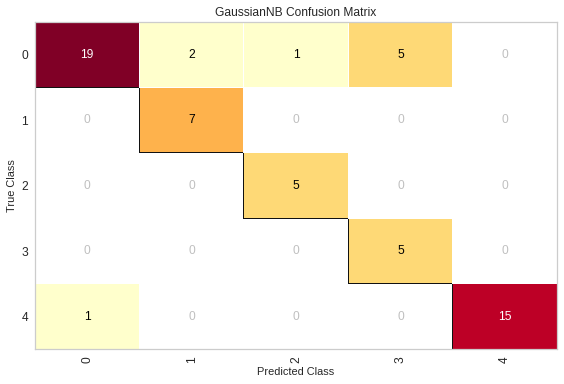

In [90]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(model, classes=['0','1', '2', '3', '4'])
cm.fit(x_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(x_test, y_test)
cm.show()


# Applying K Nearest Neighbor

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [92]:
knn = KNeighborsClassifier()

In [93]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [94]:
y_pred_train = knn.predict(x_train)

In [95]:
y_pred_train

array([2, 0, 1, 1, 4, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 4, 4, 0, 0, 4, 0, 0,
       0, 0, 0, 1, 0, 0, 2, 4, 4, 0, 4, 0, 0, 1, 0, 0, 1, 1, 4, 0, 2, 4,
       4, 4, 3, 0, 0, 0, 3, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 1, 0, 1, 3,
       0, 4, 4, 0, 4, 3, 3, 0, 4, 0, 0, 2, 1, 3, 0, 1, 0, 2, 1, 4, 0, 4,
       2, 0, 4, 0, 4, 0, 1, 4, 4, 1, 4, 4, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0,
       1, 0, 0, 0, 0, 4, 2, 0, 4, 4, 1, 0, 1, 0, 1, 2, 0, 4, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 4, 0])

In [96]:
y_pred_test = knn.predict(x_test)

In [97]:
y_pred_test

array([0, 4, 0, 0, 4, 3, 1, 2, 0, 3, 2, 4, 2, 2, 0, 1, 1, 1, 0, 4, 1, 1,
       0, 0, 1, 0, 3, 2, 0, 0, 0, 0, 3, 0, 0, 0, 4, 1, 0, 0, 3, 1, 0, 0,
       0, 2, 0, 4, 4, 4, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0])

In [98]:
print(list(y_test))

[0, 4, 0, 0, 1, 4, 3, 4, 0, 3, 2, 4, 3, 2, 0, 4, 1, 4, 0, 1, 0, 4, 0, 0, 3, 0, 4, 4, 0, 0, 0, 4, 1, 0, 0, 0, 4, 1, 0, 0, 1, 1, 0, 4, 0, 2, 0, 4, 4, 4, 0, 2, 3, 0, 0, 0, 4, 2, 0, 0]


In [99]:
accuracy_score(y_pred_train, y_train)

0.8214285714285714

In [100]:
accuracy_score(y_pred_test, y_test)

0.7

In [101]:
precision_score(y_pred_train, y_train, average=None)

array([1.        , 0.875     , 0.81818182, 0.27272727, 0.65789474])

In [102]:
precision_score(y_pred_test, y_test, average=None)

array([0.96296296, 0.42857143, 1.        , 0.4       , 0.375     ])

In [103]:
precision_score(y_pred_test, y_test, average='macro')

0.6333068783068783

In [104]:
precision_score(y_pred_test, y_test, average='weighted')

0.7530511463844797

In [105]:
confusion_matrix(y_pred_train, y_train)

array([[64,  0,  1,  0,  2],
       [ 0, 14,  0,  4,  5],
       [ 0,  0,  9,  3,  3],
       [ 0,  0,  0,  3,  3],
       [ 0,  2,  1,  1, 25]])

In [106]:
confusion_matrix(y_pred_test, y_test)

array([[26,  0,  0,  0,  3],
       [ 1,  3,  0,  2,  3],
       [ 0,  0,  5,  1,  2],
       [ 0,  2,  0,  2,  2],
       [ 0,  2,  0,  0,  6]])

In [107]:
print(classification_report(y_pred_train, y_train))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        67
           1       0.88      0.61      0.72        23
           2       0.82      0.60      0.69        15
           3       0.27      0.50      0.35         6
           4       0.66      0.86      0.75        29

    accuracy                           0.82       140
   macro avg       0.72      0.71      0.70       140
weighted avg       0.86      0.82      0.83       140



In [108]:
print(classification_report(y_pred_test, y_test))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        29
           1       0.43      0.33      0.38         9
           2       1.00      0.62      0.77         8
           3       0.40      0.33      0.36         6
           4       0.38      0.75      0.50         8

    accuracy                           0.70        60
   macro avg       0.63      0.59      0.59        60
weighted avg       0.75      0.70      0.71        60



In [109]:
def knn_model(k, X_train, X_test, Y_train, Y_test, weights='uniform', metric='minkowski'):
    # weights: uniform, distance ; metric: minkowski, euclidean, manhattan, cosine
    knn = KNeighborsClassifier(n_neighbors = k, weights=weights, metric=metric)
    print("K :", k)
    print("Weights :", weights)
    print("Metric : ", metric)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    print("\nConfusion Matrix :\n", confusion_matrix(Y_test, Y_pred))
    print("\nAccuracy Score : ", accuracy_score(Y_test, Y_pred))
    print("\nClassification Report :\n", classification_report(Y_test, Y_pred))

In [110]:
for k in range (1, 19, 2) :
  knn_model(k, x_train, x_test, y_train, y_test)

K : 1
Weights : uniform
Metric :  minkowski

Confusion Matrix :
 [[25  1  0  0  1]
 [ 0  4  0  1  2]
 [ 0  0  3  2  0]
 [ 0  0  0  2  3]
 [ 1  1  1  3 10]]

Accuracy Score :  0.7333333333333333

Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.93      0.94        27
           1       0.67      0.57      0.62         7
           2       0.75      0.60      0.67         5
           3       0.25      0.40      0.31         5
           4       0.62      0.62      0.62        16

    accuracy                           0.73        60
   macro avg       0.65      0.62      0.63        60
weighted avg       0.76      0.73      0.74        60

K : 3
Weights : uniform
Metric :  minkowski

Confusion Matrix :
 [[26  1  0  0  0]
 [ 0  4  0  2  1]
 [ 0  0  5  0  0]
 [ 0  2  0  2  1]
 [ 3  5  1  0  7]]

Accuracy Score :  0.7333333333333333

Classification Report :
               precision    recall  f1-score   support

           0    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat